<a href="https://colab.research.google.com/github/ankitha-bhaskara/Confidence-Interval-and-CLT/blob/main/GlobalRetailCorp_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [7]:
!gdown 1Lks6oHQMG1ifKfmPtBqtZL-qZctCoiwn

Downloading...
From: https://drive.google.com/uc?id=1Lks6oHQMG1ifKfmPtBqtZL-qZctCoiwn
To: /content/RetailCorp.txt
100% 23.6M/23.6M [00:00<00:00, 35.0MB/s]


####Problem Statement

In [ ]:
#The data pertains to a retail corporation present in many countries in the world and originally from the USA.
#The Management team at the Global Retail Corporation wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender
#and the various other factors to help the business make better decisions.
#They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

####Observation of Data

In [9]:
df = pd.read_csv("RetailCorp.txt")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df=df.astype({"User_ID": "object", "Occupation":"object", "Marital_Status":"object","Product_Category":"object","Age":"object"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000



There are 5.5l transactions in the sample data and there are no null values. There are 10 columns representing the following :

*   User_ID - unique ID for each customer with 5891 different users
*   Product_ID - unique ID for different products sold at the store with 3631 different products
*   Gender - Male and Female with higher number of Males
*   Age - 7 age groups starting from 0-17 to 50+
*   Occupation - is a masked value denoting 21 different occupations with occupation 4 having highest transactions
*   City_Category - 3 different categories A , B , C with City B having highest transactions
*   Stay_In_Current_City_Years - number of year lived in the city
*   Marital_Status - 0 representing Unmarried and 1 representing Married with Unmarried folks making higher number of purchases
*   Product_Cateogry - is also masked valurs denoting 20 different categories
*   Purchase - the purchase value for each transaction lowest purchase of 12 to highest purchase of 23961. The mean is higher than median meaning there are few high value purchases which are pulling the mean toward the higher side







        



####Non-graphical anlysis

In [ ]:
df.Gender.value_counts()/len(df)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
df.Age.value_counts()/len(df)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [ ]:
df.Occupation.unique()

array([10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14,
       13, 6], dtype=object)

In [ ]:
df.City_Category.value_counts()/len(df)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [ ]:
df.Marital_Status.value_counts()/len(df)*100  #0 is unmarried 1 is married

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [ ]:
df["Product_ID"].value_counts().head(20).reset_index()

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


*   75% of the sample is of males and 25% is of females
*   40% of the buyers fall in the age group of 26-35 and 60% of the buyers fall in the age group of 26-45
*   42% of buyers are from city B
*   60% of buyers are unmarried and 40% are married





In [ ]:
pd.crosstab(df.Age, df.Gender, normalize="columns")

Gender,F,M
Age,,
0-17,0.037428,0.024185
18-25,0.181343,0.181123
26-35,0.373701,0.407559
36-45,0.200060,0.199979
46-50,0.097188,0.078458
51-55,0.072852,0.069056
55+,0.037428,0.039639


In [ ]:
# we see that there is not a lot of difference between male and female spends in each age group except for 0-17 and 26-35 and 46-50

In [ ]:
pd.crosstab(df.City_Category, df.Gender, normalize="columns")

Gender,F,M
City_Category,,
A,0.262899,0.270401
B,0.425568,0.418523
C,0.311533,0.311076


In [ ]:
#there are only small differences between males and females in the cities too

In [ ]:
pd.crosstab(df.Marital_Status, df.Gender, normalize="columns")

Gender,F,M
Marital_Status,,
0,0.580381,0.593614
1,0.419619,0.406386


In [ ]:
# spending on unmarried buyers are more than married buyers for both the genders

####Visual Analysis

Text(0.5, 1.0, 'Distribution of range of purchase values')

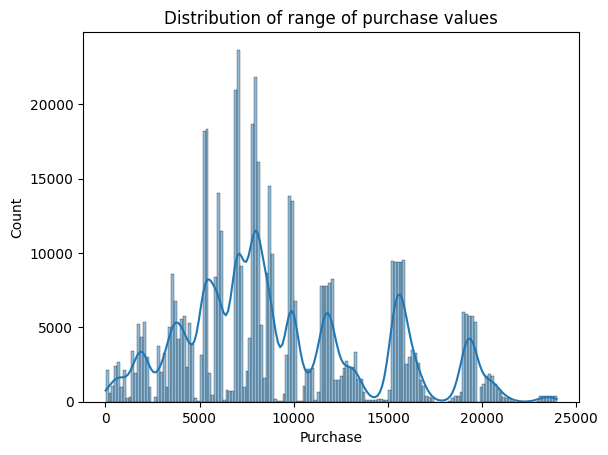

In [ ]:
sns.histplot(data=df, x="Purchase", kde=True)
plt.title("Distribution of range of purchase values")

In [ ]:
#we notice that number of transactions are more concentrated between 5000 to 10000

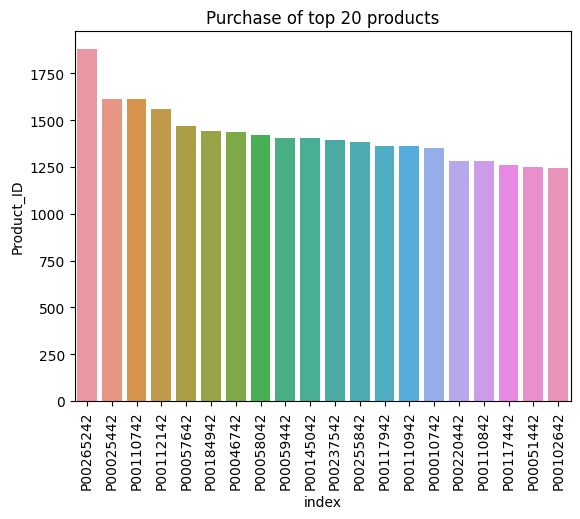

In [ ]:
sns.barplot(df, x=df["Product_ID"].value_counts().head(20).reset_index()["index"],y=df["Product_ID"].value_counts().head(20).reset_index()["Product_ID"])
plt.xticks(rotation=90)
plt.title("Purchase of top 20 products")

plt.show()

In [ ]:
# these are the top 20 products sold, if we are able to understand the type of product we can map it to the different features and perform more analysis

Text(0.5, 1.0, 'Distribution of Purchases between Genders')

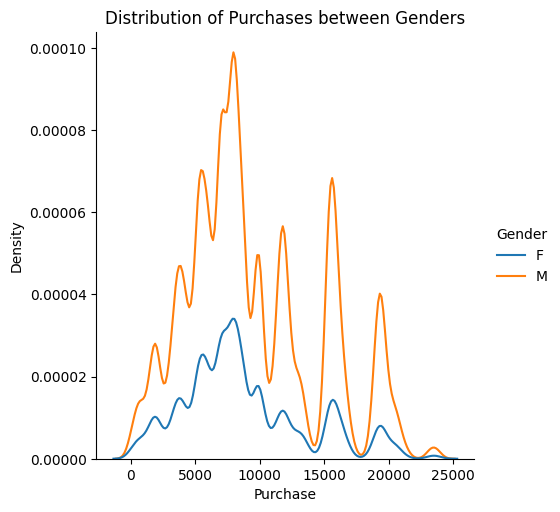

In [ ]:
sns.displot(data=df, x="Purchase", hue="Gender", kind="kde")
plt.title("Distribution of Purchases between Genders")

In [ ]:
# we see that the purchases made by males are more than females, this is fair because the sample data has more males than females.

Text(0.5, 1.0, 'Distribution of age with respect to purchases')

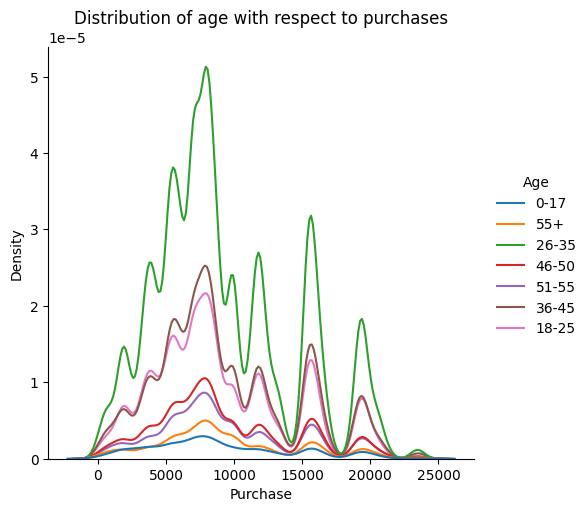

In [ ]:
sns.displot(data=df, x="Purchase", hue="Age", kind="kde")
plt.title("Distribution of age with respect to purchases")

In [ ]:
#the age group of 26-35 are the highest spenders followed by 36-45 and closly after is 18-25. So we can say that 18-45 are our major customers

<Axes: xlabel='Age', ylabel='Purchase'>

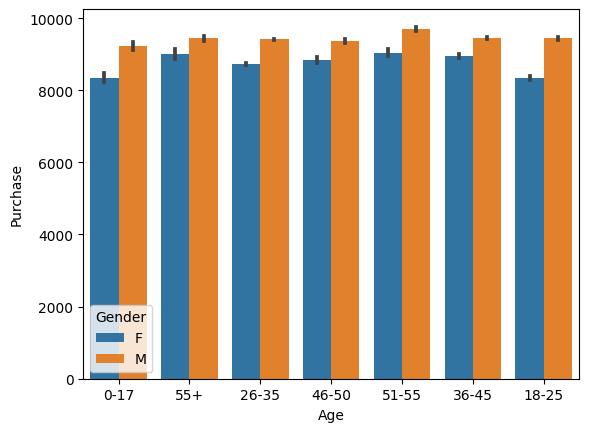

In [ ]:
sns.barplot(df,y="Purchase", x="Age", hue="Gender")

Text(0.5, 1.0, 'Distribution of Purchases based on Marital Status')

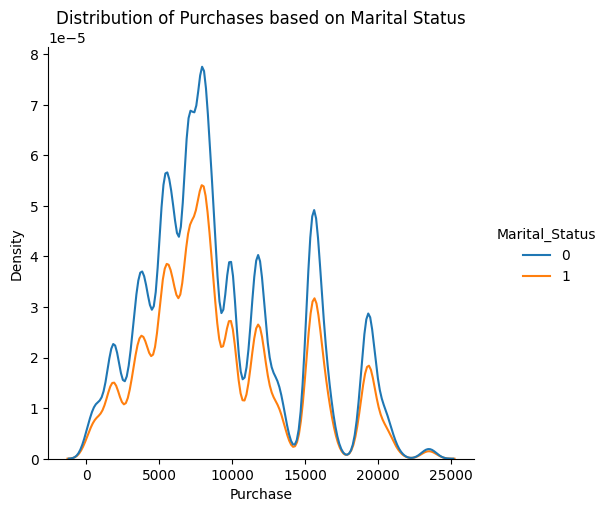

In [ ]:
sns.displot(data=df, x="Purchase", hue="Marital_Status", kind="kde")
plt.title("Distribution of Purchases based on Marital Status")

In [ ]:
# the pattern of spending for both married and unmarried buyers are similar but the volume is more for the unmarried buyers

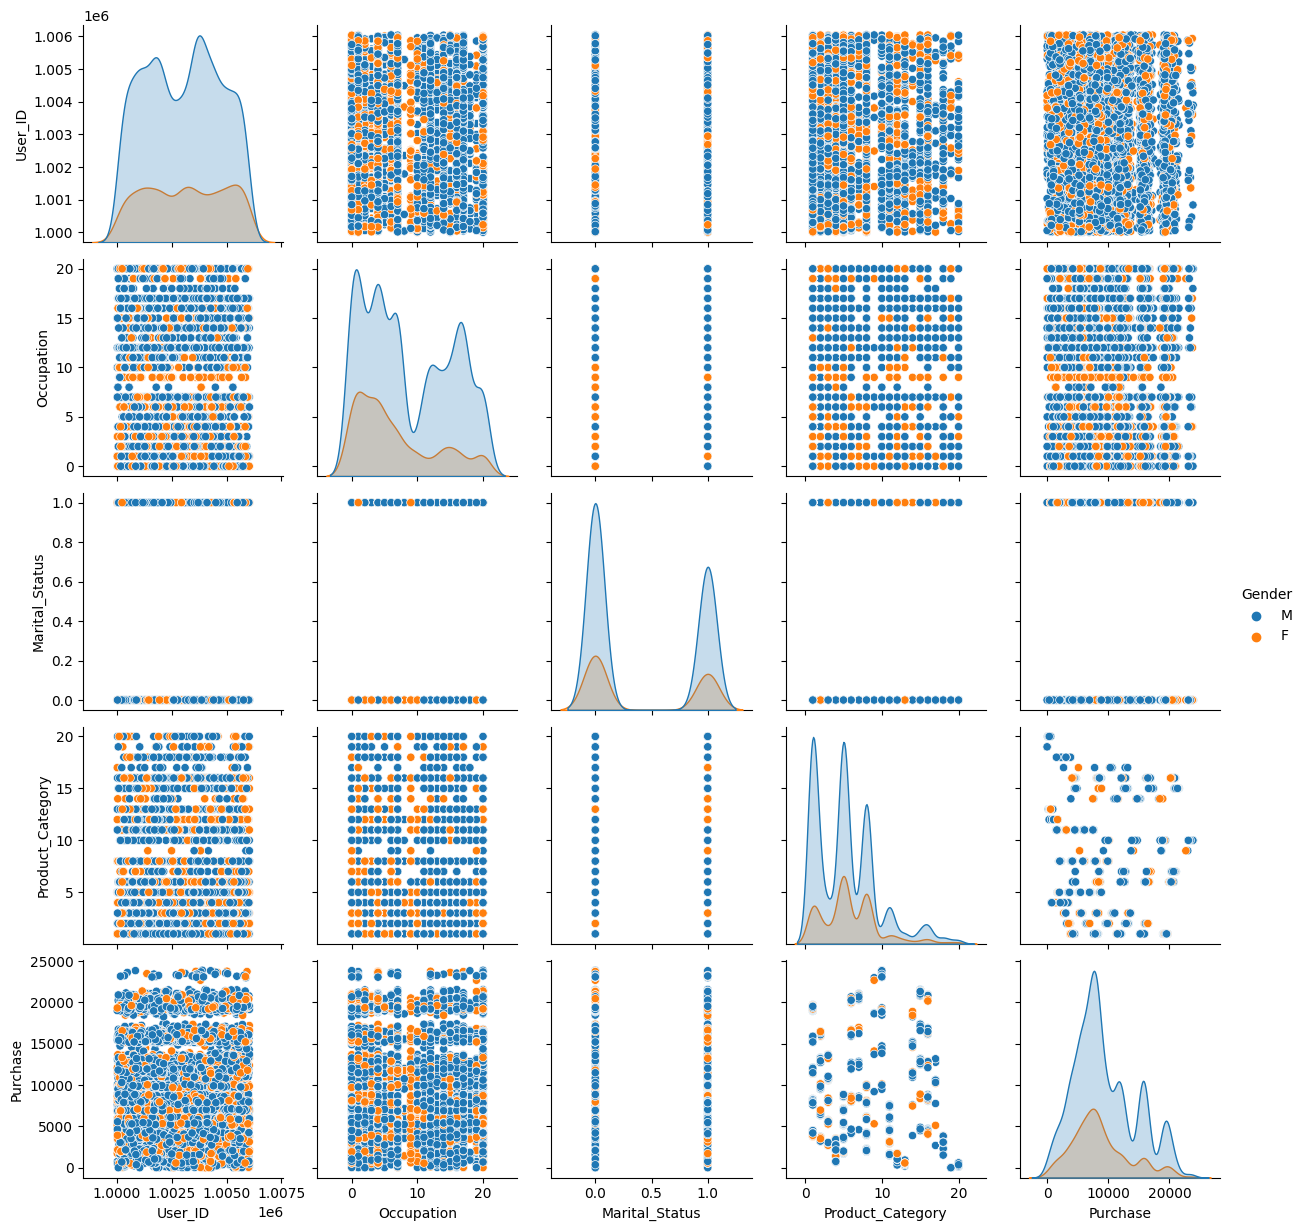

In [ ]:
sns.pairplot(df.sample(10000), hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

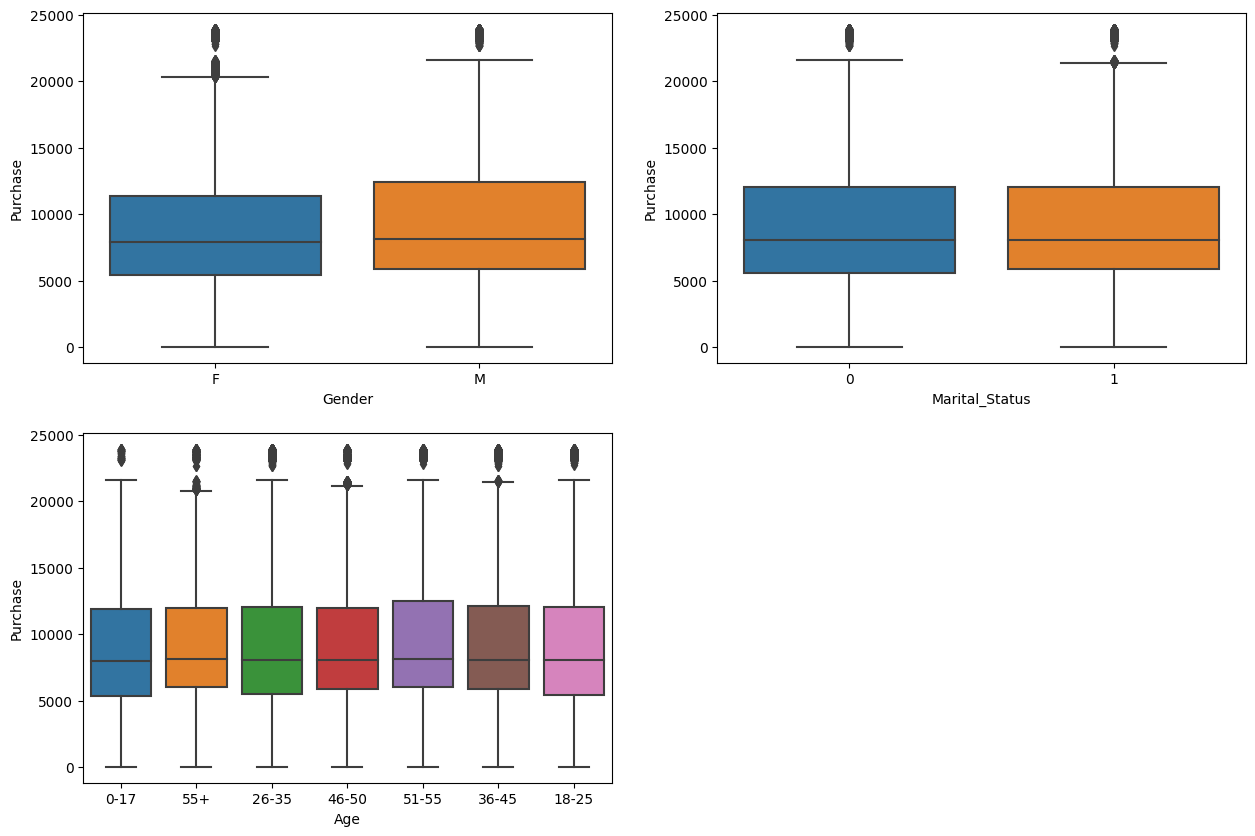

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, y="Purchase", x="Gender")

plt.subplot(2,2,2)
sns.boxplot(data=df, y="Purchase", x="Marital_Status")

plt.subplot(2,2,3)
sns.boxplot(data=df, y="Purchase", x="Age")

In [ ]:
#since analysis is to be done for Gender, Marital Status and Age wrt Purchases, Outlier detection has been performed for these.
#We see outliers are present in each case. However we are not going to ignore them because in a real scenario we would find such extreme purchases too

In [ ]:
#tests to be done for gender, marital status and age

####Analysis of Gender

In [ ]:
avg_gender = df.groupby(["User_ID","Gender"])["Purchase"].sum().reset_index()
avg_gender.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
avg_male=avg_gender[avg_gender["Gender"]=="M"]["Purchase"].mean()
avg_female=avg_gender[avg_gender["Gender"]=="F"]["Purchase"].mean()
avg_male ,avg_female
#average spends of males are more than females in the given data. Lets use CLT to check if the same would apply for the population too

(925344.4023668639, 712024.3949579832)

Sample size of 1000

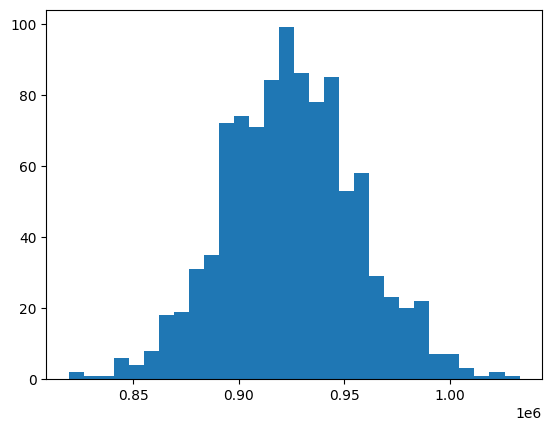

In [ ]:
#male mean calculation

male = avg_gender[avg_gender["Gender"]=="M"]["Purchase"]

sample_size=1000
no_of_samples=1000

male_means= [np.mean(male.sample(sample_size, replace=True)) for i in range (no_of_samples)]

plt.hist(male_means, bins=30)
plt.show()

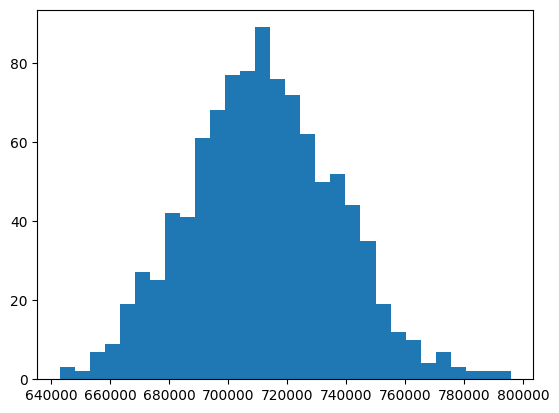

In [ ]:
#female mean calculation

female = avg_gender[avg_gender["Gender"]=="F"]["Purchase"]

sample_size=1000
no_of_samples=1000

female_means= [np.mean(female.sample(sample_size, replace=True)) for i in range (no_of_samples)]

plt.hist(female_means, bins=30)
plt.show()

In [ ]:
# we see that both male and female purchase means follow normal distribution and using the properties of CLT we can say that the sample mean would be very close to population mean
# and the standard error = sample standard deviation / square root of sample size

In [ ]:
#Calculating confidence interval for 90% confidence and sample size of 1000
z90= norm.ppf(0.95)

sample_mean_males = np.mean(male_means)
sample_mean_females = np.mean(female_means)

std_error_males = np.std(male_means)/np.sqrt(1000)
std_error_females = np.std(female_means)/np.sqrt(1000)

lower_limit_males = sample_mean_males -(z90 * std_error_males)
upper_limit_males = sample_mean_males +(z90 * std_error_males)

lower_limit_females = sample_mean_females -(z90 * std_error_females)
upper_limit_females = sample_mean_females +(z90 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 90% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 90% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 924994.46
Sample mean of females: 711962.4

Confidence Interval of males at 90% confidence: 923334.28  -  926654.64
Confidence Interval of females at 90% confidence: 710648.48  -  713276.33


In [ ]:
#Calculating confidence interval for 95% confidence and sample size of 1000
z95= norm.ppf(0.975)

sample_mean_males = np.mean(male_means)
sample_mean_females = np.mean(female_means)

std_error_males = np.std(male_means)/np.sqrt(1000)
std_error_females = np.std(female_means)/np.sqrt(1000)

lower_limit_males = sample_mean_males -(z95 * std_error_males)
upper_limit_males = sample_mean_males +(z95 * std_error_males)

lower_limit_females = sample_mean_females -(z95 * std_error_females)
upper_limit_females = sample_mean_females +(z95 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 95% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 95% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 924994.46
Sample mean of females: 711962.4

Confidence Interval of males at 95% confidence: 923016.24  -  926972.68
Confidence Interval of females at 95% confidence: 710396.77  -  713528.04


In [ ]:
#Calculating confidence interval for 99% confidence and sample size of 1000
z99= norm.ppf(0.995)

sample_mean_males = np.mean(male_means)
sample_mean_females = np.mean(female_means)

std_error_males = np.std(male_means)/np.sqrt(1000)
std_error_females = np.std(female_means)/np.sqrt(1000)

lower_limit_males = sample_mean_males -(z99 * std_error_males)
upper_limit_males = sample_mean_males +(z99 * std_error_males)

lower_limit_females = sample_mean_females -(z99 * std_error_females)
upper_limit_females = sample_mean_females +(z99 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 99% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 99% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 924994.46
Sample mean of females: 711962.4

Confidence Interval of males at 99% confidence: 922394.63  -  927594.29
Confidence Interval of females at 99% confidence: 709904.81  -  714020.0


#####Observations from the tests performed above with sample size of 1000:
#####1: The population mean and sample means for both males and females spends tend to be close to each other
#####2: The confidence intervals of males do not overlap confidence intervals of females in all the 3 CI tests. This means that there is significant difference in spends between the 2 genders and male spends are more than female spends

Sample size of 2000

In [ ]:
male = avg_gender[avg_gender["Gender"]=="M"]["Purchase"]
female = avg_gender[avg_gender["Gender"]=="F"]["Purchase"]

sample_size=2000
no_of_samples=1000

male_means_2000= [np.mean(male.sample(sample_size, replace=True)) for i in range (no_of_samples)]
female_means_2000= [np.mean(female.sample(sample_size, replace=True)) for i in range (no_of_samples)]

In [ ]:
#Calculating confidence interval for 90% confidence and sample size of 2000
z90= norm.ppf(0.95)

sample_mean_males = np.mean(male_means_2000)
sample_mean_females = np.mean(female_means_2000)

std_error_males = np.std(male_means_2000)/np.sqrt(2000)
std_error_females = np.std(female_means_2000)/np.sqrt(2000)

lower_limit_males = sample_mean_males -(z90 * std_error_males)
upper_limit_males = sample_mean_males +(z90 * std_error_males)

lower_limit_females = sample_mean_females -(z90 * std_error_females)
upper_limit_females = sample_mean_females +(z90 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 90% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 90% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 925124.21
Sample mean of females: 711466.63

Confidence Interval of males at 90% confidence: 924334.42  -  925914.0
Confidence Interval of females at 90% confidence: 710808.29  -  712124.97


In [ ]:
#Calculating confidence interval for 95% confidence and sample size of 2000
z95= norm.ppf(0.975)

sample_mean_males = np.mean(male_means_2000)
sample_mean_females = np.mean(female_means_2000)

std_error_males = np.std(male_means_2000)/np.sqrt(2000)
std_error_females = np.std(female_means_2000)/np.sqrt(2000)

lower_limit_males = sample_mean_males -(z95 * std_error_males)
upper_limit_males = sample_mean_males +(z95 * std_error_males)

lower_limit_females = sample_mean_females -(z95 * std_error_females)
upper_limit_females = sample_mean_females +(z95 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 95% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 95% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 925124.21
Sample mean of females: 711466.63

Confidence Interval of males at 95% confidence: 924183.12  -  926065.3
Confidence Interval of females at 95% confidence: 710682.17  -  712251.09


In [ ]:
#Calculating confidence interval for 99% confidence and sample size of 2000
z99= norm.ppf(0.995)

sample_mean_males = np.mean(male_means_2000)
sample_mean_females = np.mean(female_means_2000)

std_error_males = np.std(male_means_2000)/np.sqrt(2000)
std_error_females = np.std(female_means_2000)/np.sqrt(2000)

lower_limit_males = sample_mean_males -(z99 * std_error_males)
upper_limit_males = sample_mean_males +(z99 * std_error_males)

lower_limit_females = sample_mean_females -(z99 * std_error_females)
upper_limit_females = sample_mean_females +(z99 * std_error_females)


print("Population mean of males:", round(avg_male,2))
print("Population mean of females:", round(avg_female,2))
print()
print("Sample mean of males:", round(sample_mean_males,2))
print("Sample mean of females:", round(sample_mean_females,2))
print()
print("Confidence Interval of males at 99% confidence:", round(lower_limit_males,2), " - ", round(upper_limit_males,2))
print("Confidence Interval of females at 99% confidence:", round(lower_limit_females,2), " - ", round(upper_limit_females,2))


Population mean of males: 925344.4
Population mean of females: 712024.39

Sample mean of males: 925124.21
Sample mean of females: 711466.63

Confidence Interval of males at 99% confidence: 923887.41  -  926361.01
Confidence Interval of females at 99% confidence: 710435.67  -  712497.59


#####Observations from the tests performed above with sample size of 2000:
#####1: The population mean and sample means for both males and females spends tend to be close to each other
#####2: The confidence intervals of males do not overlap confidence intervals of females in all the 3 CI tests. This means that there is significant difference in spends between the 2 genders and male spends are more than female spends
######3: Upon increasing the sample size the CI has narrowed and is closer to the means

Analysis of Marital Status

In [ ]:
avg_ms = df.groupby(["User_ID","Marital_Status"])["Purchase"].sum().reset_index()
avg_unmarried = avg_ms[avg_ms["Marital_Status"]==0]
avg_married = avg_ms[avg_ms["Marital_Status"]==1]

avg_ms.Marital_Status.value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [ ]:
pop_unmarried = avg_unmarried["Purchase"].mean()
pop_married = avg_married["Purchase"].mean()

pop_unmarried , pop_married

(880575.7819724905, 843526.7966855295)

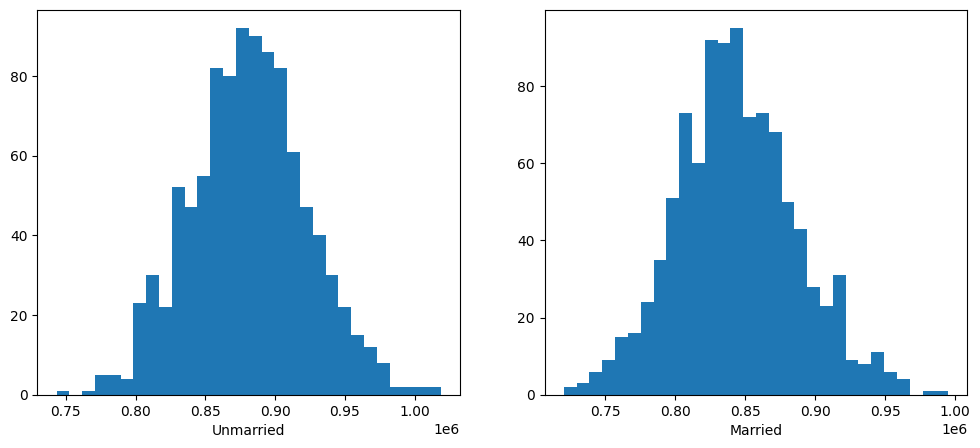

In [ ]:
#Marital status mean calculations

sample_size=500
n_sample=1000

mean_unmarried= [np.mean(avg_unmarried["Purchase"].sample(sample_size, replace=True)) for i in range (n_sample)]
mean_married= [np.mean(avg_married["Purchase"].sample(sample_size, replace=True)) for i in range (n_sample)]

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.hist(mean_unmarried, bins=30)
plt.xlabel("Unmarried")

plt.subplot(1,2,2)
plt.hist(mean_married, bins=30)
plt.xlabel("Married")

plt.show()

In [ ]:
# We see the distribution of the means of purchases of married and unmarried buyers follow Normal Distribution. There we will use CLT to derive the Confidence Intervals

In [ ]:
#Calculating confidence interval for 90% confidence and sample size of 500
z90= norm.ppf(0.95)

sample_mean_unmarried = np.mean(mean_unmarried)
sample_mean_married = np.mean(mean_married)

std_error_unmarried = np.std(mean_unmarried)/np.sqrt(500)
std_error_married = np.std(mean_married)/np.sqrt(500)

lower_limit_unmarried = sample_mean_unmarried -(z90 * std_error_unmarried)
upper_limit_unmarried = sample_mean_unmarried +(z90 * std_error_unmarried)

lower_limit_married = sample_mean_married -(z90 * std_error_married)
upper_limit_married = sample_mean_married +(z90 * std_error_married)

print("Population mean of unmarried:", round(pop_unmarried,2))
print("Population mean of married:", round(pop_married,2))
print()
print("Sample mean of unmarried:", round(sample_mean_unmarried,2))
print("Sample mean of married:", round(sample_mean_married,2))
print()
print("Confidence Interval of unmarried at 90% confidence:", round(lower_limit_unmarried,2), " - ", round(upper_limit_unmarried,2))
print("Confidence Interval of married at 90% confidence:", round(lower_limit_married,2), " - ", round(upper_limit_married,2))

Population mean of unmarried: 880575.78
Population mean of married: 843526.8

Sample mean of unmarried: 881111.53
Sample mean of married: 843734.78

Confidence Interval of unmarried at 90% confidence: 878053.11  -  884169.94
Confidence Interval of married at 90% confidence: 840557.5  -  846912.07


In [ ]:
#Calculating confidence interval for 95% confidence and sample size of 500
z95= norm.ppf(0.975)

sample_mean_unmarried = np.mean(mean_unmarried)
sample_mean_married = np.mean(mean_married)

std_error_unmarried = np.std(mean_unmarried)/np.sqrt(500)
std_error_married = np.std(mean_married)/np.sqrt(500)

lower_limit_unmarried = sample_mean_unmarried -(z95 * std_error_unmarried)
upper_limit_unmarried = sample_mean_unmarried +(z95 * std_error_unmarried)

lower_limit_married = sample_mean_married -(z95 * std_error_married)
upper_limit_married = sample_mean_married +(z95 * std_error_married)

print("Population mean of unmarried:", round(pop_unmarried,2))
print("Population mean of married:", round(pop_married,2))
print()
print("Sample mean of unmarried:", round(sample_mean_unmarried,2))
print("Sample mean of married:", round(sample_mean_married,2))
print()
print("Confidence Interval of unmarried at 95% confidence:", round(lower_limit_unmarried,2), " - ", round(upper_limit_unmarried,2))
print("Confidence Interval of married at 95% confidence:", round(lower_limit_married,2), " - ", round(upper_limit_married,2))

Population mean of unmarried: 880575.78
Population mean of married: 843526.8

Sample mean of unmarried: 881111.53
Sample mean of married: 843734.78

Confidence Interval of unmarried at 95% confidence: 877467.2  -  884755.85
Confidence Interval of married at 95% confidence: 839948.82  -  847520.75


In [ ]:
#Calculating confidence interval for 99% confidence and sample size of 500
z99= norm.ppf(0.995)

sample_mean_unmarried = np.mean(mean_unmarried)
sample_mean_married = np.mean(mean_married)

std_error_unmarried = np.std(mean_unmarried)/np.sqrt(500)
std_error_married = np.std(mean_married)/np.sqrt(500)

lower_limit_unmarried = sample_mean_unmarried -(z99 * std_error_unmarried)
upper_limit_unmarried = sample_mean_unmarried +(z99 * std_error_unmarried)

lower_limit_married = sample_mean_married -(z99 * std_error_married)
upper_limit_married = sample_mean_married +(z99 * std_error_married)

print("Population mean of unmarried:", round(pop_unmarried,2))
print("Population mean of married:", round(pop_married,2))
print()
print("Sample mean of unmarried:", round(sample_mean_unmarried,2))
print("Sample mean of married:", round(sample_mean_married,2))
print()
print("Confidence Interval of unmarried at 99% confidence:", round(lower_limit_unmarried,2), " - ", round(upper_limit_unmarried,2))
print("Confidence Interval of married at 99% confidence:", round(lower_limit_married,2), " - ", round(upper_limit_married,2))

Population mean of unmarried: 880575.78
Population mean of married: 843526.8

Sample mean of unmarried: 881111.53
Sample mean of married: 843734.78

Confidence Interval of unmarried at 99% confidence: 876322.07  -  885900.98
Confidence Interval of married at 99% confidence: 838759.18  -  848710.39


#####Observations from the tests performed above with sample size of 500 between unmarried and married customers:
#####1: The population mean for both unmarried and married customers and their sample means are tending to be close to each other
#####2: The confidence intervals of unmarried customers do not overlap confidence intervals of married customers in all the 3 CI tests. This means that there is significant difference in spends between the 2 types of customers even at 99% level of confidence
######3: We notice that spends of unmarried customers are more than married customers

#####Analysis of age

In [ ]:
avg_age = df.groupby(["User_ID","Age"])["Purchase"].sum().reset_index()
avg_age.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
avg_age.Age.value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
age_group=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
sample_size=200
n_sample=1000

all_groups = []


for i in age_group:
    k = [np.mean(avg_age[avg_age["Age"]==i]["Purchase"].sample(sample_size, replace=True)) for j in range (n_sample)]
    all_groups.append(k)


In [ ]:
group_names=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
for i in range(len(all_groups)):
  print("Population mean for age group",group_names[i], ":", np.mean(all_groups[i]))

Population mean for age group 0-17 : 619494.515325
Population mean for age group 55+ : 539613.957775
Population mean for age group 26-35 : 989436.63423
Population mean for age group 46-50 : 791225.80213
Population mean for age group 51-55 : 762393.11392
Population mean for age group 36-45 : 879476.483945
Population mean for age group 18-25 : 853112.510555


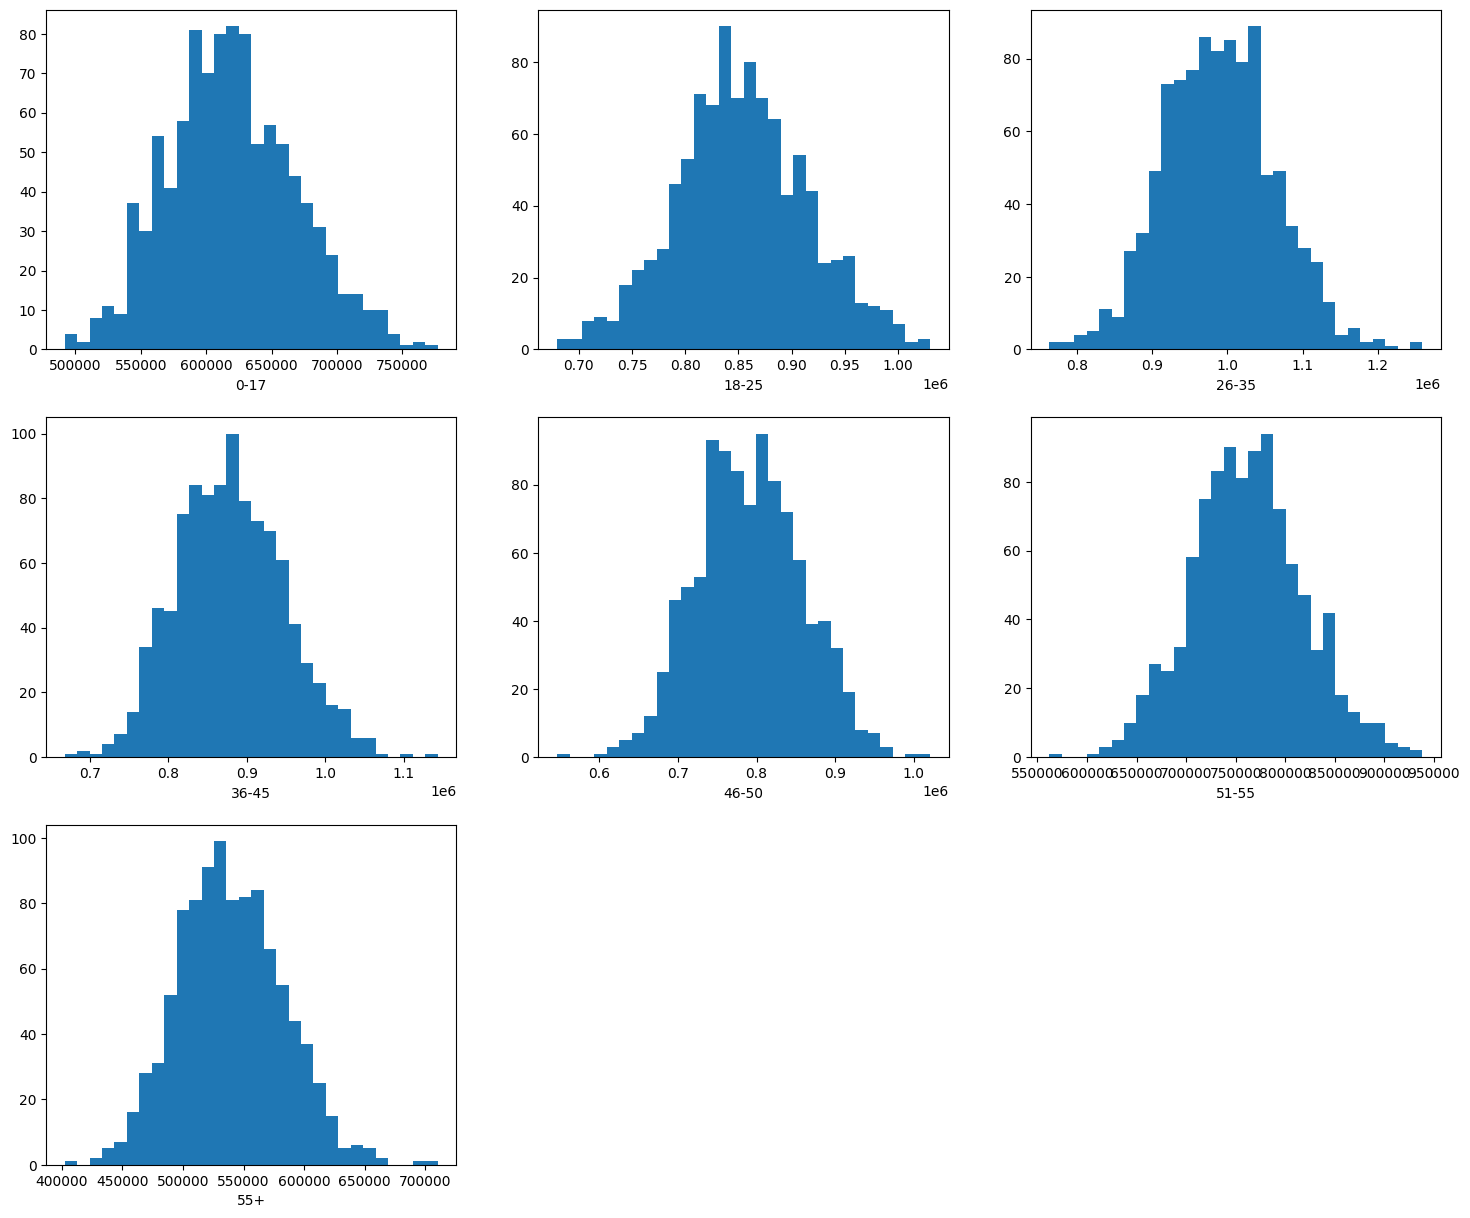

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.hist(all_groups[0], bins=30)
plt.xlabel("0-17")

plt.subplot(3,3,7)
plt.hist(all_groups[1], bins=30)
plt.xlabel("55+")

plt.subplot(3,3,3)
plt.hist(all_groups[2], bins=30)
plt.xlabel("26-35")

plt.subplot(3,3,5)
plt.hist(all_groups[3], bins=30)
plt.xlabel("46-50")

plt.subplot(3,3,6)
plt.hist(all_groups[4], bins=30)
plt.xlabel("51-55")

plt.subplot(3,3,4)
plt.hist(all_groups[5], bins=30)
plt.xlabel("36-45")

plt.subplot(3,3,2)
plt.hist(all_groups[6], bins=30)
plt.xlabel("18-25")

plt.show()

In [ ]:
# we notice that the mean of purchases of different age groups also follow Normal distribution. Hence we can use CLT to calculate CI

In [ ]:
#Confidence interval with 90% confidence
group_names=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
z90= norm.ppf(0.95)


for i in range(len(all_groups)):
  sample_mean = np.mean(all_groups[i])
  std_error = np.std(all_groups[i])/np.sqrt(200)
  lower_limit = sample_mean -(z90 * std_error)
  upper_limit = sample_mean +(z90 * std_error)
  print("Confidence Interval at 90% confidence for", group_names[i] ," :", round(lower_limit,2), "-", round(upper_limit,2))

# Age_0_17= all_groups[0]
# Age_more_55 = all_groups[1]
# Age_26_35= all_groups[2]
# Age_46_50= all_groups[3]
# Age_51_55= all_groups[4]
# Age_36_45= all_groups[5]
# Age_18_25= all_groups[6]

Confidence Interval at 90% confidence for 0-17  : 613803.05 - 625185.98
Confidence Interval at 90% confidence for 55+  : 534612.48 - 544615.44
Confidence Interval at 90% confidence for 26-35  : 980826.65 - 998046.62
Confidence Interval at 90% confidence for 46-50  : 783399.4 - 799052.21
Confidence Interval at 90% confidence for 51-55  : 755836.13 - 768950.1
Confidence Interval at 90% confidence for 36-45  : 871552.54 - 887400.42
Confidence Interval at 90% confidence for 18-25  : 845908.47 - 860316.55


In [ ]:
#Confidence interval with 95% confidence
group_names=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
z95= norm.ppf(0.975)


for i in range(len(all_groups)):
  sample_mean = np.mean(all_groups[i])
  std_error = np.std(all_groups[i])/np.sqrt(200)
  lower_limit = sample_mean -(z95 * std_error)
  upper_limit = sample_mean +(z95 * std_error)
  print("Confidence Interval at 95% confidence for", group_names[i] ," :", round(lower_limit,2), "-", round(upper_limit,2))


Confidence Interval at 95% confidence for 0-17  : 612712.72 - 626276.31
Confidence Interval at 95% confidence for 55+  : 533654.33 - 545573.59
Confidence Interval at 95% confidence for 26-35  : 979177.21 - 999696.06
Confidence Interval at 95% confidence for 46-50  : 781900.06 - 800551.54
Confidence Interval at 95% confidence for 51-55  : 754579.98 - 770206.24
Confidence Interval at 95% confidence for 36-45  : 870034.53 - 888918.44
Confidence Interval at 95% confidence for 18-25  : 844528.36 - 861696.66


In [ ]:
#Confidence interval with 99% confidence
group_names=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
z99= norm.ppf(0.995)


for i in range(len(all_groups)):
  sample_mean = np.mean(all_groups[i])
  std_error = np.std(all_groups[i])/np.sqrt(200)
  lower_limit = sample_mean -(z99 * std_error)
  upper_limit = sample_mean +(z99 * std_error)
  print("Confidence Interval at 99% confidence for", group_names[i] ," :", round(lower_limit,2), "-", round(upper_limit,2))


Confidence Interval at 99% confidence for 0-17  : 610581.73 - 628407.3
Confidence Interval at 99% confidence for 55+  : 531781.68 - 547446.24
Confidence Interval at 99% confidence for 26-35  : 975953.46 - 1002919.81
Confidence Interval at 99% confidence for 46-50  : 778969.7 - 803481.9
Confidence Interval at 99% confidence for 51-55  : 752124.92 - 772661.31
Confidence Interval at 99% confidence for 36-45  : 867067.65 - 891885.32
Confidence Interval at 99% confidence for 18-25  : 841831.03 - 864393.99


In [ ]:
#we see that even by increasing the confidence levels till 99% there is no overlap in the CI for the different age group of customers

####Observations and Recommendations:

**Observation 1:** From the initial non-graphical and visual analysis we noticed that there was not a lot of difference in spending between the 2 genders.
Upon performing further statitical analysis based on CLT we see that the males spending in considerably more than female spending.

**Recommendation 1:** The company could consider adding more products that appeal to the female buyers or promote certain existing products specifically to females.

**Observation 2:**
From the initial non-graphical and visual analysis we noticed that the pattern os spending between the married and unmarried buyers are similar, but the volume is more by the unmarried byuers.
Upon performing further statitical analysis based on CLT we see that there is only a 4% difference between their population means [(880575.78-843526.8)/880575.78*100].

**Recommendation 2:** The company needs to focus much on the marital status of buyers when it comes to analysis

**Observation 3:** From the initial non-graphical and visual analysis we noticed that the top 3 spenders with respect to age groups are 26-35, 36-45 and 18-25. Upon performing further statitical analysis based on CLT we see that this pattern holdes true for the population as well based on their respective means.

**Recommendation 3:** The company could consider coming up with ages specific promotional campaigns since this feature does have an impact on the spending.